In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import patches as patch
import matplotlib.animation as anim
from IPython.display import HTML
from skimage import measure
import time
from matplotlib.patches import Rectangle
import urllib.request as urlr
from tqdm import tqdm

# Tracking from live-feed

## `Non-parametric()`

In [2]:
def Non_parametric(test, ROI, BINS):
    img = np.copy(test)
    img = img/255
    ROI = ROI/255

    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]

    I = R+G+B

    I[I==0] = 10

    r = R/I
    g = G/I

    ROI_R = ROI[:,:,0]
    ROI_G = ROI[:,:,1]
    ROI_B = ROI[:,:,2]

    ROI_I = ROI_R+ROI_G+ROI_B
    ROI_r = ROI_R/ROI_I
    ROI_g = ROI_G/ROI_I

    r_roi_int = (ROI_r*(BINS-1)).astype(int)
    g_roi_int = (ROI_g*(BINS-1)).astype(int)

    matrix, xbin, ybin = np.histogram2d(g_roi_int.flatten(), r_roi_int.flatten(), bins = BINS, range = [[0,BINS],[0,BINS]])
    r_int, g_int = (r*(BINS-1)).astype(int), (g*(BINS-1)).astype(int)

    back_projection = np.zeros(r.shape)
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            back_projection[i,j] = matrix[g_int[i,j], r_int[i,j]]
    
    return back_projection

## ROI Selection

In [14]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()

r = cv2.selectROI(image)
ROI = image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

## Histogram Comparison

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


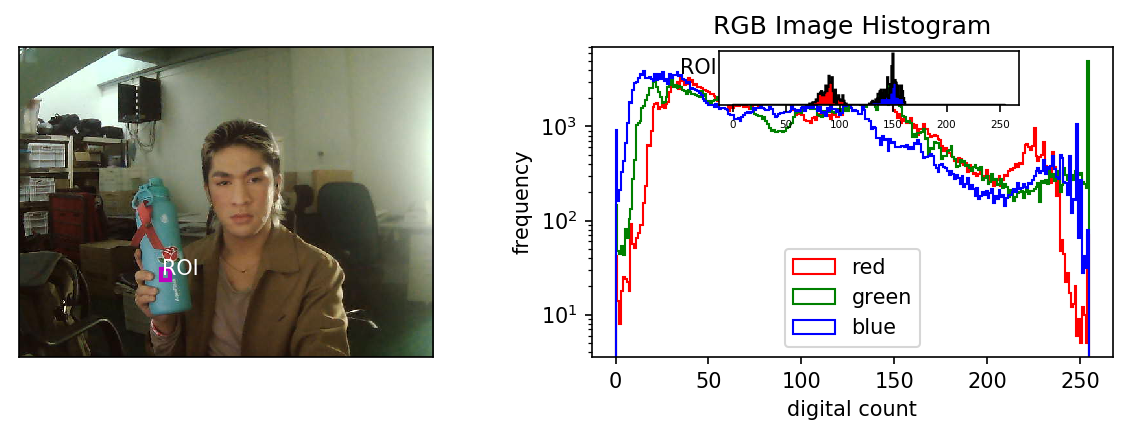

In [15]:
fig, ax = plt.subplots(1,2, figsize = (8,3), dpi = 150)

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_xticks([])
ax[0].set_yticks([])

r_coords = r
rect = Rectangle((r_coords[0],r_coords[1]),
                     r_coords[2],r_coords[3],
                     linewidth=2,edgecolor='m',facecolor='none')
ax[0].add_patch(rect)
ax[0].annotate("ROI", (r_coords[0]+r_coords[2]/5, r_coords[1]+r_coords[3]/2), color = 'w')


ax[1].hist(image[:,:,2].flatten(), bins = 256, range = [0,255], histtype = "step", ec = 'r', label = 'red')
ax[1].hist(image[:,:,1].flatten(), bins = 256, range = [0,255], histtype = "step", ec = 'g', label = 'green')
ax[1].hist(image[:,:,0].flatten(), bins = 256, range = [0,255], histtype = "step", ec = 'b', label = 'blue')

left, bottom, width, height = [0.65, 0.75, 0.25, 0.12]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.hist(ROI[:,:,2].flatten(), bins = 256, range = [0,255], histtype = "stepfilled", fc = 'r', ec = 'k')
ax2.hist(ROI[:,:,1].flatten(), bins = 256, range = [0,255], histtype = "stepfilled", fc = 'g', ec = 'k')
ax2.hist(ROI[:,:,0].flatten(), bins = 256, range = [0,255], histtype = "stepfilled", fc = 'b', ec = 'k')
ax2.set_ylabel("ROI", fontsize = 10, rotation = 0, labelpad=10)
ax2.tick_params(axis='x', labelsize= 5)
ax2.set_yticks([])
# ax2.set_edgecolor('m')

# ax[1].grid()
ax[1].legend(loc =8)
ax[1].set_yscale("log")
ax[1].set_xlabel("digital count")
ax[1].set_ylabel("frequency")
ax[1].set_title("RGB Image Histogram")

plt.tight_layout()
plt.show()

## Segmentation

(480, 0)

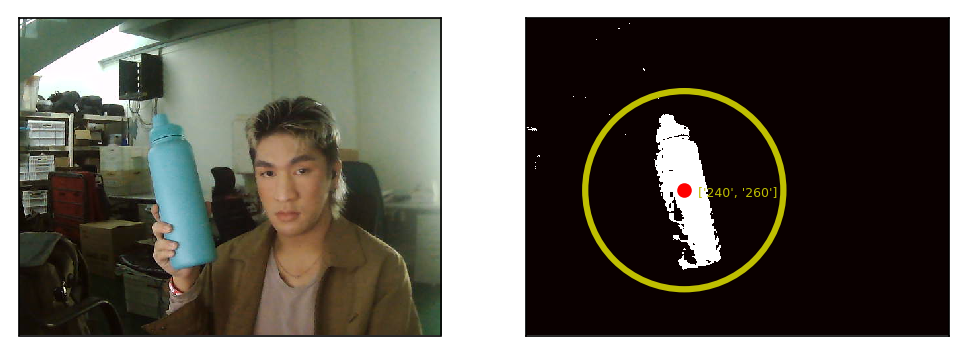

In [49]:
camera = cv2.VideoCapture(0)
return_value, test = camera.read()

fig, ax = plt.subplots(1,2, figsize = (8,3), dpi = 150)

ax[0].imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
ax[0].set_xticks([])
ax[0].set_yticks([])

segmented = Non_parametric(test, ROI, BINS = 15)

ax[1].imshow(segmented, cmap = 'hot')

ret, thresh = cv2.threshold(segmented, 50,255, cv2.THRESH_BINARY)
M = cv2.moments(thresh)

cX = int(zero_div(M["m10"], M["m00"]))
cY = int(zero_div(M["m01"], M["m00"]))

circle = plt.Circle((cX, cY), 150, linewidth=3,edgecolor='y',facecolor='none')
ax[1].add_patch(circle)
ax[1].plot(cX, cY, 'ro')
ax[1].text(cX+20,cY+10,[str(int(cX)),str(int(cY))], color = "y", fontsize = 6)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlim(0,640)
ax[1].set_ylim(480,0)

In [30]:
def zero_div(x, y):
    return x / y if y else 0

## Capturing

### First Frame

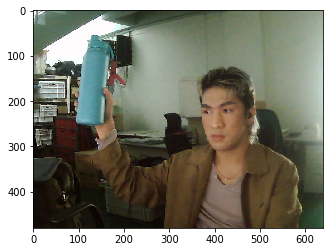

In [50]:
camera = cv2.VideoCapture(0)
return_value, test = camera.read()
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

### Take 100 frames

In [51]:
camera = cv2.VideoCapture(0)
test_ = []

i = 1
while i < 100:
    print("Capturing Frame: " + str(i))
    return_value, test = camera.read()
    test_.append(test)
    i += 1
del(camera)

Capturing Frame: 1
Capturing Frame: 2
Capturing Frame: 3
Capturing Frame: 4
Capturing Frame: 5
Capturing Frame: 6
Capturing Frame: 7
Capturing Frame: 8
Capturing Frame: 9
Capturing Frame: 10
Capturing Frame: 11
Capturing Frame: 12
Capturing Frame: 13
Capturing Frame: 14
Capturing Frame: 15
Capturing Frame: 16
Capturing Frame: 17
Capturing Frame: 18
Capturing Frame: 19
Capturing Frame: 20
Capturing Frame: 21
Capturing Frame: 22
Capturing Frame: 23
Capturing Frame: 24
Capturing Frame: 25
Capturing Frame: 26
Capturing Frame: 27
Capturing Frame: 28
Capturing Frame: 29
Capturing Frame: 30
Capturing Frame: 31
Capturing Frame: 32
Capturing Frame: 33
Capturing Frame: 34
Capturing Frame: 35
Capturing Frame: 36
Capturing Frame: 37
Capturing Frame: 38
Capturing Frame: 39
Capturing Frame: 40
Capturing Frame: 41
Capturing Frame: 42
Capturing Frame: 43
Capturing Frame: 44
Capturing Frame: 45
Capturing Frame: 46
Capturing Frame: 47
Capturing Frame: 48
Capturing Frame: 49
Capturing Frame: 50
Capturing

## Result

Processing Frame 99: 100%|█████████████████████| 99/99 [00:36<00:00,  2.73it/s]


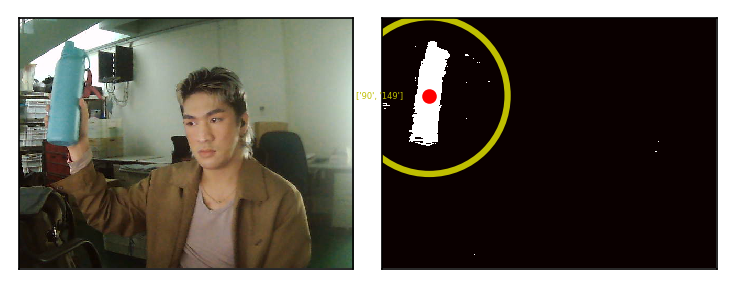

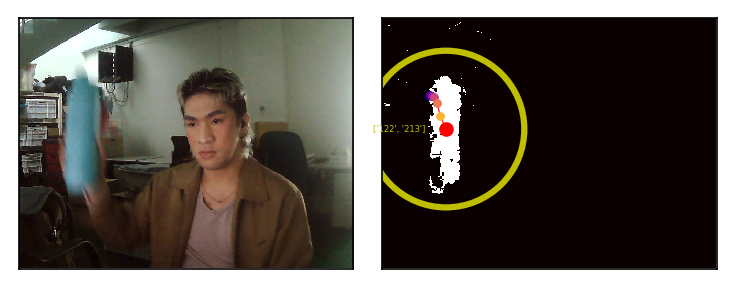

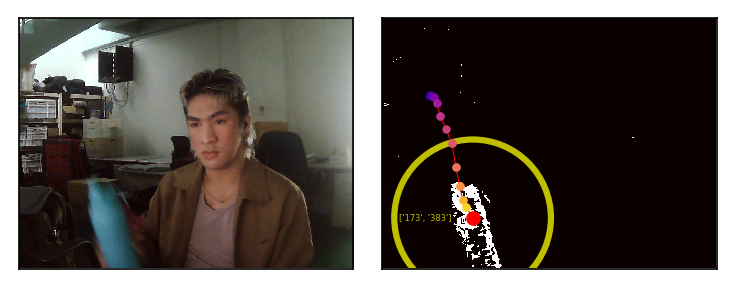

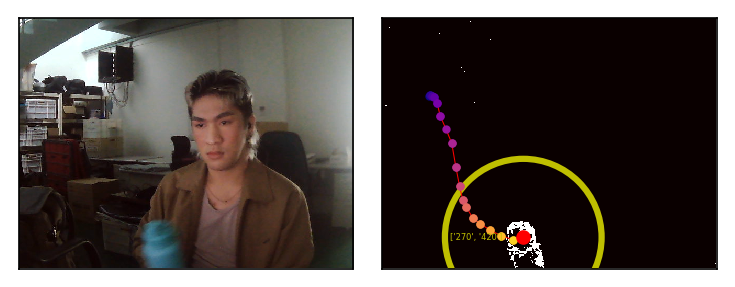

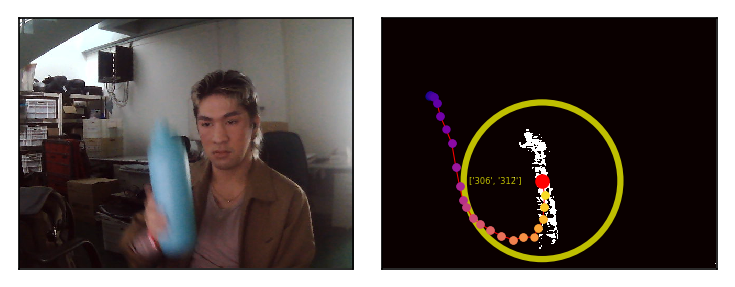

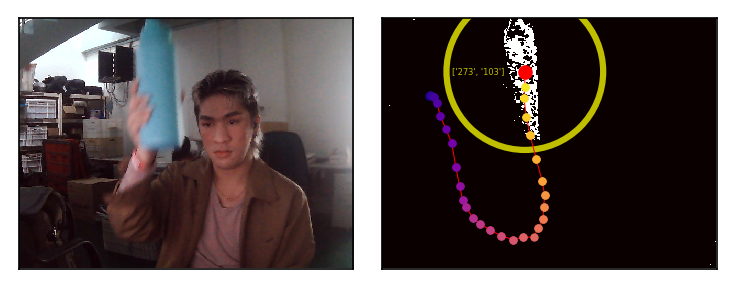

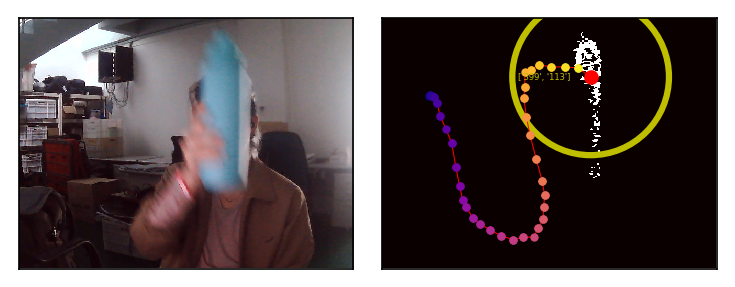

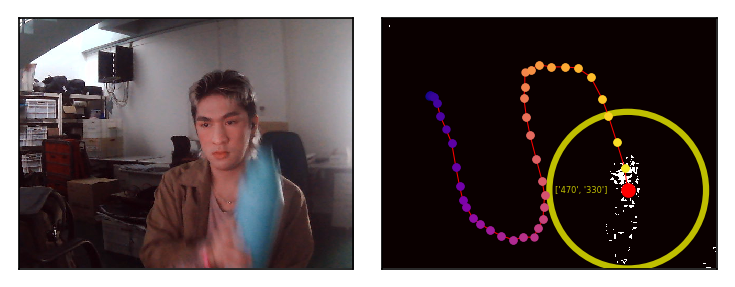

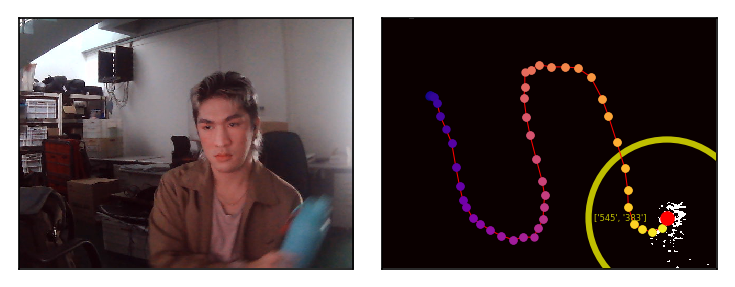

In [60]:
segmented_ = []

captures = []
tracked = []

CX = []
CY = []



for i in tqdm(range(99), "Processing Frame " + str(i+1)):
    fig, ax = plt.subplots(1,2, figsize = (5,2), dpi = 150)

    ax[0].imshow(cv2.cvtColor(test_[i], cv2.COLOR_BGR2RGB))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    segmented = Non_parametric(test_[i], ROI, BINS = 15)
 
    ret, thresh = cv2.threshold(segmented, 50,255, cv2.THRESH_BINARY)
    segmented_.append(thresh)

    M = cv2.moments(thresh)

    
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    CX.append(cX)
    CY.append(cY)
    
    ax[1].imshow(segmented_[i], cmap = 'hot')

    plt.plot(CX, CY, "-", lw = 0.5, color = 'r')

    for i in range(len(CX)):
        plt.plot(CX[i], CY[i], ".", color = plt.cm.plasma(i/len(CX)))
    
    circle = plt.Circle((cX, cY), 150, linewidth=3,edgecolor='y',facecolor='none')
    ax[1].add_patch(circle)
    ax[1].plot(cX, cY, 'ro')
    ax[1].text(cX-140,cY+5,[str(int(cX)),str(int(cY))], color = "y", fontsize = 4)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_xlim(0,640)
    ax[1].set_ylim(480,0)    
    plt.tight_layout()
    plt.savefig('.\\trial2\\' + str(i) + '.png')
    
    if i%11 != 0:
        plt.close()

(480, 0)

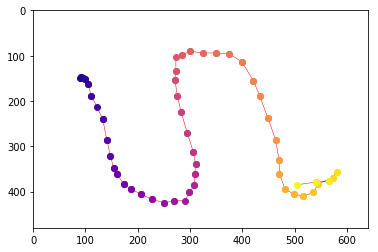

In [59]:
plt.plot(CX, CY, "-", lw = 0.5, color = 'r')

for i in range(len(CX)):
    plt.plot(CX[i], CY[i], "o", color = plt.cm.plasma(i/len(CX)))

plt.xlim(0,640)
plt.ylim(480,0)

# Tracking a recorded video

In [62]:
image = cv2.imread("frames/frame0.jpg")
r = cv2.selectROI(image)
ROI = image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


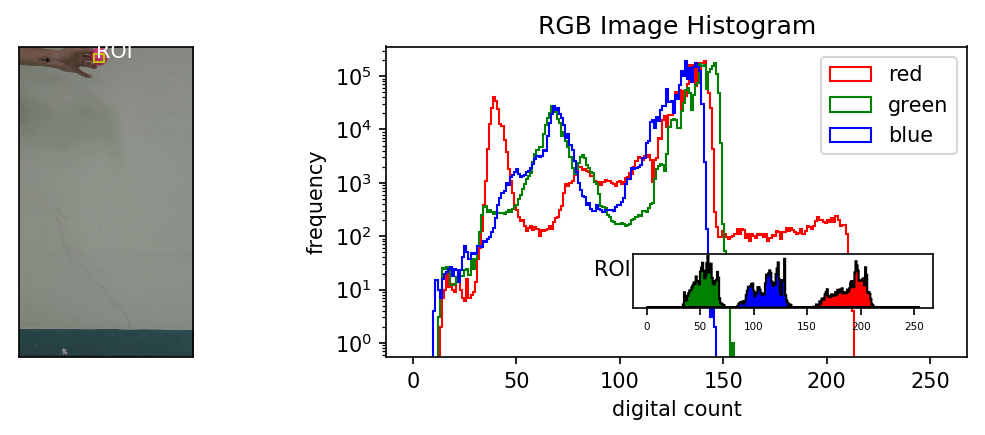

In [64]:
fig, ax = plt.subplots(1,2, figsize = (8,3), dpi = 150)

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_xticks([])
ax[0].set_yticks([])

r_coords = r
rect = Rectangle((r_coords[0],r_coords[1]),
                     r_coords[2],r_coords[3],
                     linewidth=1,edgecolor='y',facecolor='none')
ax[0].add_patch(rect)
ax[0].annotate("ROI", (r_coords[0]+r_coords[2]/5, r_coords[1]+r_coords[3]/2), color = 'w')


ax[1].hist(image[:,:,2].flatten(), bins = 256, range = [0,255], histtype = "step", ec = 'r', label = 'red')
ax[1].hist(image[:,:,1].flatten(), bins = 256, range = [0,255], histtype = "step", ec = 'g', label = 'green')
ax[1].hist(image[:,:,0].flatten(), bins = 256, range = [0,255], histtype = "step", ec = 'b', label = 'blue')

left, bottom, width, height = [0.7, 0.30, 0.25, 0.12]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.hist(ROI[:,:,2].flatten(), bins = 256, range = [0,255], histtype = "stepfilled", fc = 'r', ec = 'k')
ax2.hist(ROI[:,:,1].flatten(), bins = 256, range = [0,255], histtype = "stepfilled", fc = 'g', ec = 'k')
ax2.hist(ROI[:,:,0].flatten(), bins = 256, range = [0,255], histtype = "stepfilled", fc = 'b', ec = 'k')
ax2.set_ylabel("ROI", fontsize = 10, rotation = 0, labelpad=10)
ax2.tick_params(axis='x', labelsize= 5)
ax2.set_yticks([])
# ax2.set_edgecolor('m')

# ax[1].grid()
ax[1].legend(loc =0)
ax[1].set_yscale("log")
ax[1].set_xlabel("digital count")
ax[1].set_ylabel("frequency")
ax[1].set_title("RGB Image Histogram")

plt.tight_layout()
plt.show()

Processing Frame 99: 100%|███████████████████| 118/118 [02:49<00:00,  1.43s/it]


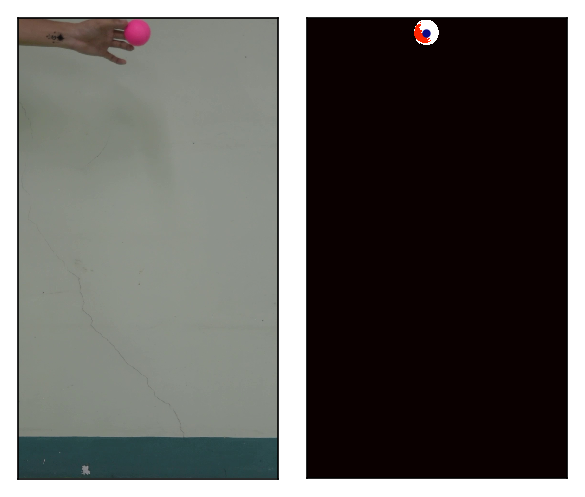

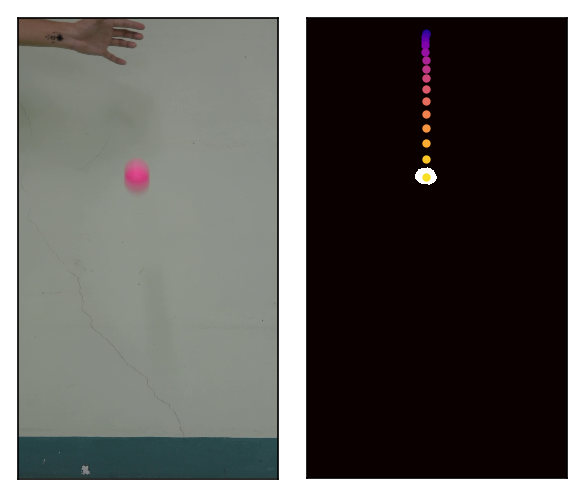

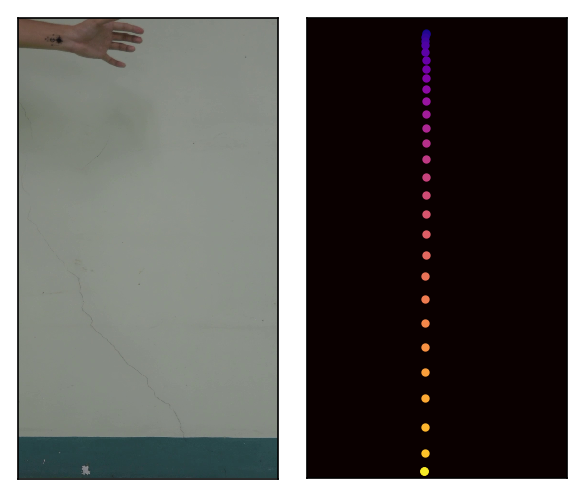

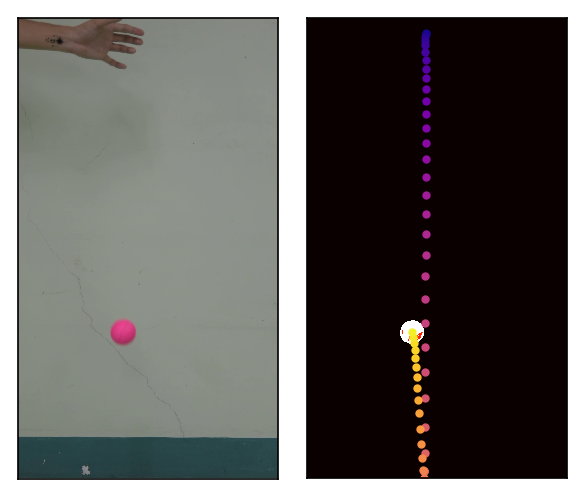

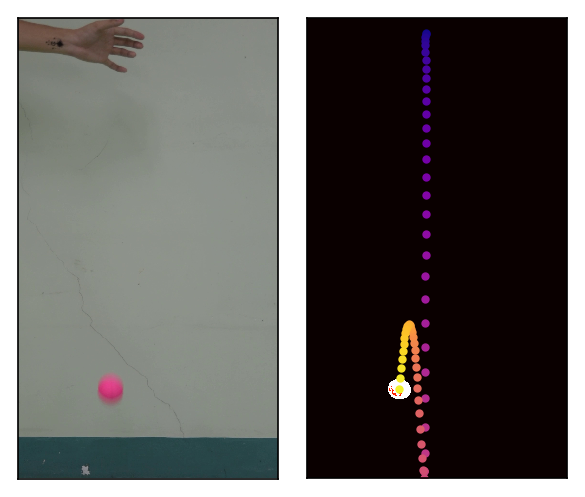

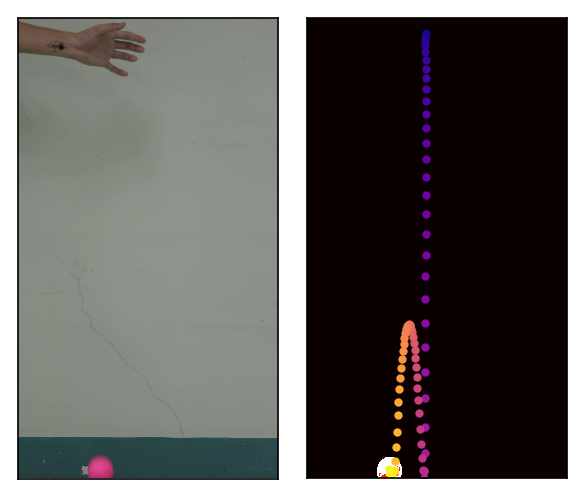

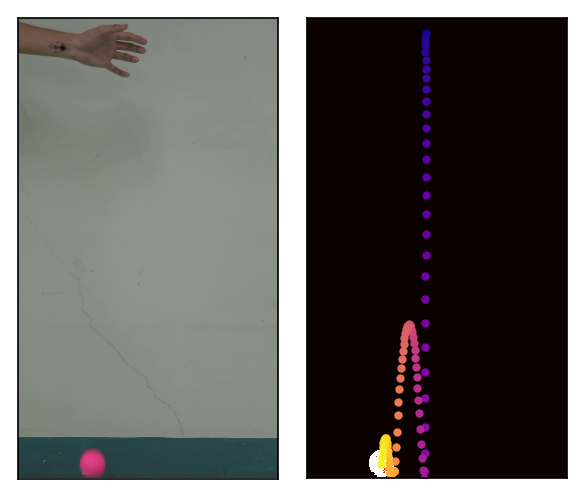

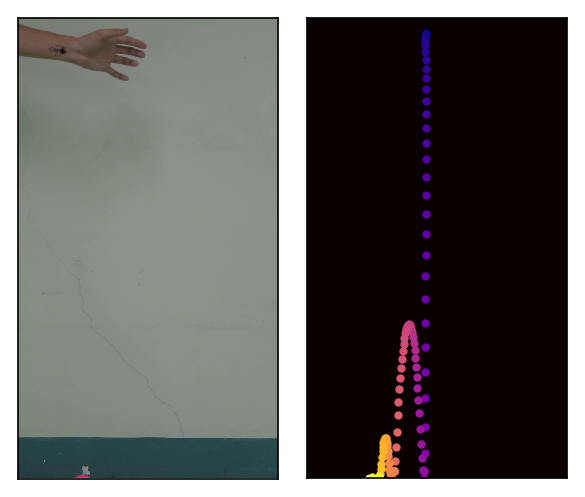

In [65]:
counts = 118

CX = []
CY = []

for i in tqdm(range(counts), "Processing Frame " + str(i+1)):
    fig, ax = plt.subplots(1,2, figsize = (4,4), dpi = 150)

    test_ = cv2.imread("frames/frame"+str(i)+".jpg")
    
    ax[0].imshow(cv2.cvtColor(test_, cv2.COLOR_BGR2RGB))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    segmented = Non_parametric(test_, ROI, BINS = 15)
 
    ret, thresh = cv2.threshold(segmented, 100,255, cv2.THRESH_BINARY)

    M = cv2.moments(thresh)
    
    cX = int(zero_div(M["m10"], M["m00"]))
    cY = int(zero_div(M["m01"], M["m00"]))
    
    if cX <= 0: CX.append(CX[-1])
    else: CX.append(cX)
    if cY <= 0: CY.append(CY[-1])
    else: CY.append(cY)

    ax[1].imshow(segmented, cmap = 'hot')

    for i in range(len(CX)):
        plt.plot(CX[i], CY[i], ".", color = plt.cm.plasma(i/len(CX)))
    
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_xlim(0,1080)
    ax[1].set_ylim(1920,0)    
    plt.tight_layout()
    
    plt.savefig('.\\segmented\\' + str(i) + '.png')
    
    if i%15 != 0:
        plt.close()

In [66]:
Y = np.copy(CY)
Y = (-np.array(Y[:-1])+ 1920)*0.065/104.65

## Trajectory

Text(0.5,0,'time, $s$')

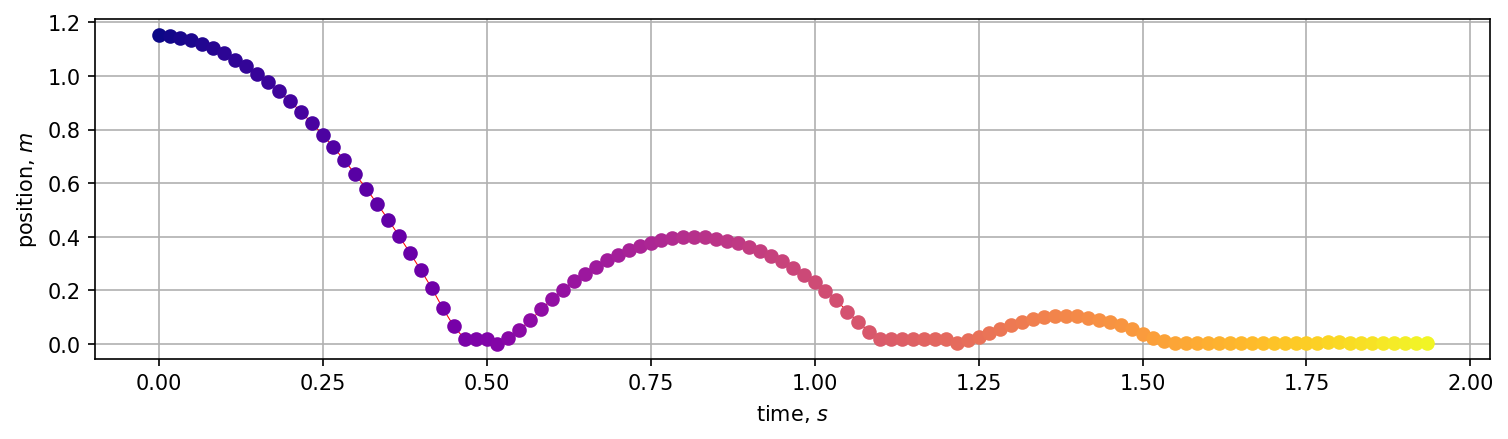

In [67]:
plt.figure(figsize=[12,3], dpi = 150)
fps = 60
duration = len(Y)/fps
t = np.arange(0, duration, 1/fps)

plt.plot(t, Y, "-", lw = 0.5, color = 'r')
for i in range(len(Y)):
    plt.plot(t[i], Y[i], "o", color = plt.cm.plasma(i/len(Y)))
plt.grid()
plt.ylabel("position, $m$")
plt.xlabel("time, $s$")

## Calculating $g$

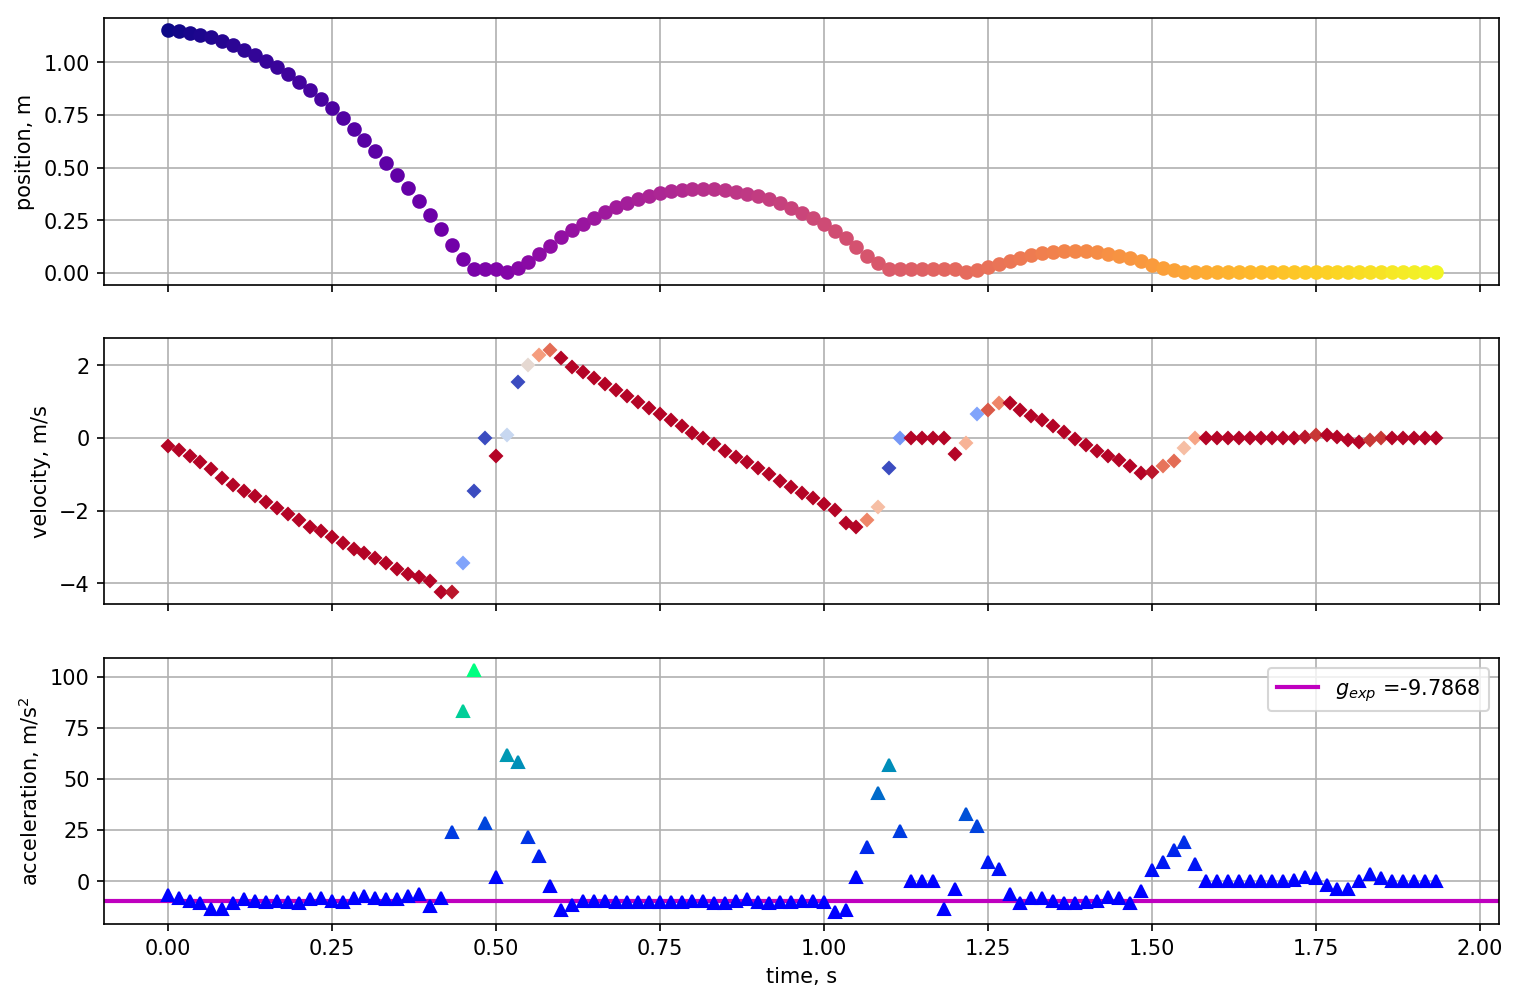

In [68]:
plt.figure(figsize=[12,8], dpi = 150)

y = Y

dt = t[1]-t[0]
dtdy = np.gradient(y, dt)

dt2d2y = np.gradient(dtdy, dt)


ax1 = plt.subplot(311)
for i in range(len(Y)):
    plt.plot(t[i], Y[i], "o", color = plt.cm.plasma(i/len(Y)))
plt.grid()
plt.ylabel("position, m")
plt.setp(ax1.get_xticklabels(), visible=False)


ax2 = plt.subplot(312)
for i in range(len(Y)):
    plt.plot(t[i], dtdy[i], "D", color = plt.cm.coolwarm_r(dtdy[i]-dtdy[i-1]), ms = 4)
plt.grid()
plt.ylabel("velocity, m/s")
plt.setp(ax2.get_xticklabels(), visible=False)


ax3 = plt.subplot(313)

# g = np.mean(dt2d2y[:25])
g = np.mean(dt2d2y[dt2d2y < -5])
plt.axhline(g, color = 'm', lw = 2, label = "$g_{exp}$ ="  + str(np.round(g,4)))

for i in range(len(Y)):
    plt.plot(t[i], dt2d2y[i], "^", color = plt.cm.winter(dt2d2y[i]/dt2d2y.max()))
plt.grid()
plt.ylabel("acceleration, m/s$^2$")
plt.xlabel("time, s")
plt.legend()
plt.show()

# Face Detection

In [3]:
import cv2
import sys
import logging as log
import datetime as dt
from time import sleep

cascPath = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
log.basicConfig(filename='webcam.log',level=log.INFO)

video_capture = cv2.VideoCapture(0)
anterior = 0

while True:
    if not video_capture.isOpened():
        print('Unable to load camera.')
        sleep(5)
        pass

    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    if anterior != len(faces):
        anterior = len(faces)
        log.info("faces: "+str(len(faces))+" at "+str(dt.datetime.now()))


    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('s'): 

        check, frame = video_capture.read()
        cv2.imshow("Capturing", frame)
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        cv2.imwrite(filename='saved_img.jpg', img=frame)
        video_capture.release()
        img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
        img_new = cv2.imshow("Captured Image", img_new)
        cv2.waitKey(1650)
        print("Image Saved")
        print("Program End")
        cv2.destroyAllWindows()

        break
    elif cv2.waitKey(1) & 0xFF == ord('q'):
        print("Turning off camera.")
        video_capture.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        breaks

    # Display the resulting frame
    cv2.imshow('Video', frame)

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# Optical Flow

In [71]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
while(1):
    ret, frame2 = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    cv.imshow('frame2', bgr)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv.imwrite('opticalfb2.png', frame2)
        cv.imwrite('opticalhsv2.png', bgr)
    prvs = next
cv.destroyAllWindows()

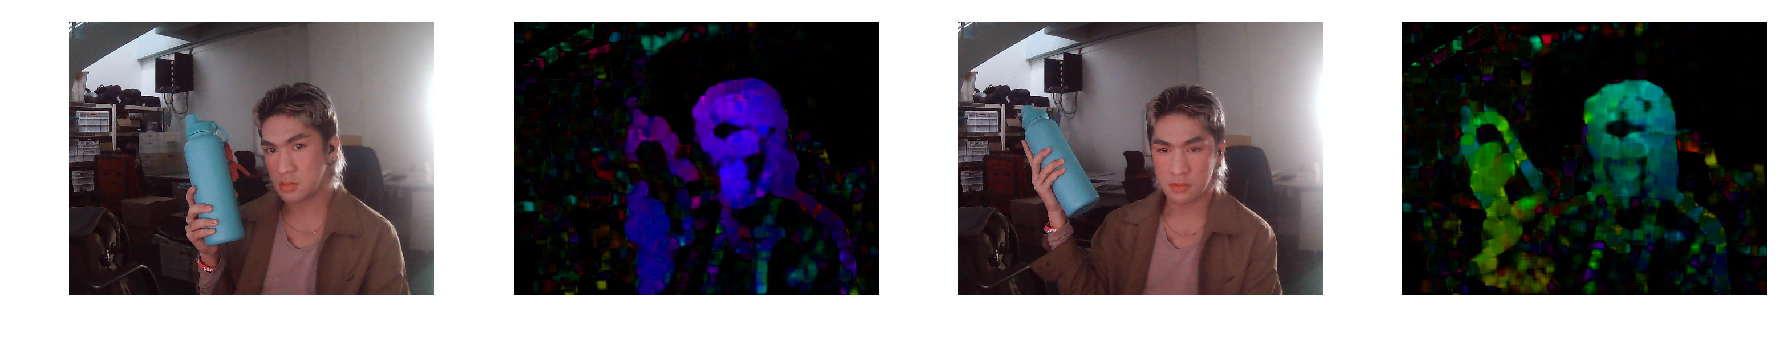

In [91]:
plt.figure(figsize = (12,3), dpi = 150)

plt.subplot(141)
plt.imshow(plt.imread("opticalfb.png"))
plt.axis("off")
plt.subplot(142)
plt.imshow(plt.imread("opticalhsv.png"))
plt.axis("off")
plt.subplot(143)
plt.imshow(plt.imread("opticalfb2.png"))
plt.axis("off")
plt.subplot(144)
plt.imshow(plt.imread("opticalhsv2.png"))
plt.axis("off")

plt.tight_layout()